# Used libraries

In [37]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp

# Common functions

In [2]:
# frequency simulation for one particualr allele
def SimulateTrajectory(f:"admixture rate",
                       s:"force of natural selection",
                       n:"population size",
                       g:"total numper of simulated generations",
                       Tn:"time gap of neutrality",
                       output_tr=False):
    na = n * f
    nA = n * ( 1 - f )

    result = [f]
    fix_freq = None

    for gen in range(0,g+1) :

    ### total fitness for each genotype
        if gen < Tn:
            na_fitness = na
            nA_fitness = nA
        else:
            na_fitness = na * ( 1 + s )
            nA_fitness = nA

        draw_p = float( na_fitness ) / float( na_fitness + nA_fitness )
        if draw_p == 0.0 or draw_p == 1.0:
            fix_freq = draw_p
            break

        new_na = np.random.binomial(n,draw_p)

        result.append(float(new_na)/float(n))

        na = new_na
        nA = n - na
    while len(result) < g+1:
        result.append(fix_freq)
    if output_tr:
        print( "TR\t" + "\t".join(result) )
    return result

# Research of of force of natural selectin

## Simulation (function) --- long to calculate

**Note: fixed allele from the following function has frequency 1!!!**

In [118]:
# plot percent of fixed alleles for different set of Tn and s
def GetFixedPercentF(N:"amount of simuations for particular set of (f, s, n, g, Tn)",
                     Tn_range:"range of different periods of neutrality",
                     s_range:"range of different forces of selection",
                     f:"admixture rate",
                     n:"population size",
                     g:"total numper of simulated generations"):
    
    grid = np.zeros((len(Tn_range), len(s_range)))
    
    for i, Tn in enumerate(Tn_range):
        for j, s in enumerate(s_range):
            tmp = []
            for k in range(N):
                tmp.append(SimulateTrajectory(f, s, n, g, Tn)[-1])
            tmp = np.array(tmp)
            grid[i, j] = len(tmp[tmp == 1.]) / N # here frequency equals 1, which is true !!!
        print(f"Done {round((i+1)/len(Tn_range)*100)} %")
    
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(1000 * px, 1000 * px))
    sns.heatmap(grid, vmin = 0, vmax = 1, xticklabels = s_range, yticklabels = Tn_range, annot=True, fmt=".2f", ax=ax)

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

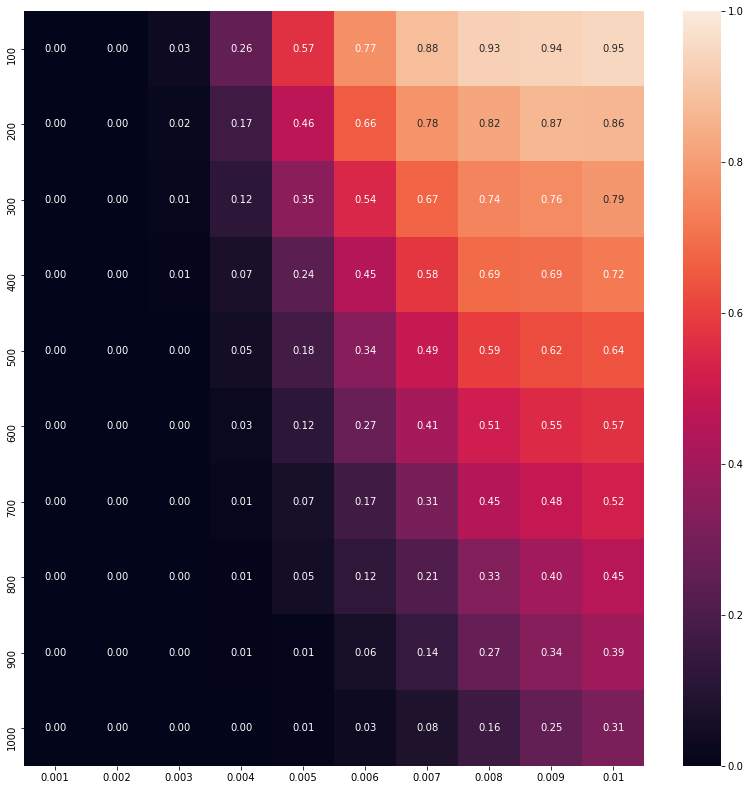

In [119]:
GetFixedPercentF(1000, [(i+1)*100 for i in range(10)], [(i+1)/1000 for i in range(10)], 0.03, 10000, 2000)

## Simulation (SELAM)

**Note: fixed allele in SELAM dataset has frequency 0!!!**

In [47]:
test_data = FormData(r"C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest")[:, :, 0]

Working file 0 / 10000
Working file 100 / 10000
Working file 200 / 10000
Working file 300 / 10000
Working file 400 / 10000
Working file 500 / 10000
Working file 600 / 10000
Working file 700 / 10000
Working file 800 / 10000
Working file 900 / 10000
Working file 1000 / 10000
Working file 1100 / 10000
Working file 1200 / 10000
Working file 1300 / 10000
Working file 1400 / 10000
Working file 1500 / 10000
Working file 1600 / 10000
Working file 1700 / 10000
Working file 1800 / 10000
Working file 1900 / 10000
Working file 2000 / 10000
Working file 2100 / 10000
Working file 2200 / 10000
Working file 2300 / 10000
Working file 2400 / 10000
Working file 2500 / 10000
Working file 2600 / 10000
Working file 2700 / 10000
Working file 2800 / 10000
Working file 2900 / 10000
Working file 3000 / 10000
Working file 3100 / 10000
Working file 3200 / 10000
Working file 3300 / 10000
Working file 3400 / 10000
Working file 3500 / 10000
Working file 3600 / 10000
Working file 3700 / 10000
Working file 3800 / 1000

In [45]:
def FormData(path):

    temp_data = []
    inputs = []

    file_list = sorted(os.listdir(path))
    train_number = len(file_list)

    for i in range(train_number):
        if (i % 100) == 0:
            print(f"Working file {i} / {train_number}")
        exact_file = path + '/' + file_list[i]
        file = open(exact_file, 'r')
        for line_num, line in enumerate(file):
            array = line.split('\t')
            temp = [array[2], array[3], array[4], array[5], array[6], array[7], array[8], array[9], array[10]]
            temp = [float(i) if i != '-nan' and i != '-nan\n' else float(0) for i in temp]
            if temp[0] != 0:
                temp[0] = temp[0] * 10
            if temp[1] != 0:
                temp[1] = temp[1] * 1000
            if temp[2] != 0:
                temp[2] = temp[2] * 1000
            if temp[3] != 0:
                temp[3] = temp[3] * 1000000
            if temp[4] != 0:
                temp[4] = temp[4] * 1000000
            if temp[5] != 0:
                temp[5] = temp[5] * 1000
            if temp[6] != 0:
                temp[6] = temp[6] * 1000
            if temp[7] != 0:
                temp[7] = temp[7] * 1000
            if temp[8] != 0:
                temp[8] = temp[8] * 1000
            temp_data += [temp]
            if line_num == 1001:
                break
        temp = np.array(temp_data)
#         start = temp[:500, :]
#         end = temp[1001:500:-1, :]
#         temp_data = np.concatenate((np.add(start, end) / 2, temp[500, :].reshape((1, 1, 9))), axis=0)
        inputs += [temp_data]
        temp_data = []
        file.close()

    return np.array(inputs)

### For all dataset

In [125]:
def GetFixedPercentS(data:"numpy array with frequencies",
                     Tn_range:"range of different periods of neutrality",
                     s_range:"range of different forces of selection"):
    
    files = np.array(list(map(lambda name: np.array(name.split('_'))[[0, 2]].astype(dtype=float), sorted(os.listdir(r"C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest")))))
    grid = np.zeros((len(Tn_range), len(s_range)))
    N = data.shape[1]

    for i, Tn in enumerate(Tn_range):
        for j, s in enumerate(s_range):
            selected = data[(files[:, 0] == Tn) * (files[:, 1] == s)]
            for k in range(len(selected)):
                grid[i, j] += len(selected[k][selected[k] == 0.]) / N / len(selected) # here frequency equals 0, which is true !!!

        print(f"Done {round((i+1)/len(Tn_range)*100)} %")
    
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(1400 * px, 600 * px))
    sns.heatmap(grid, xticklabels = s_range, yticklabels = Tn_range, annot=True, fmt=".2f", square=True, ax=ax)

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

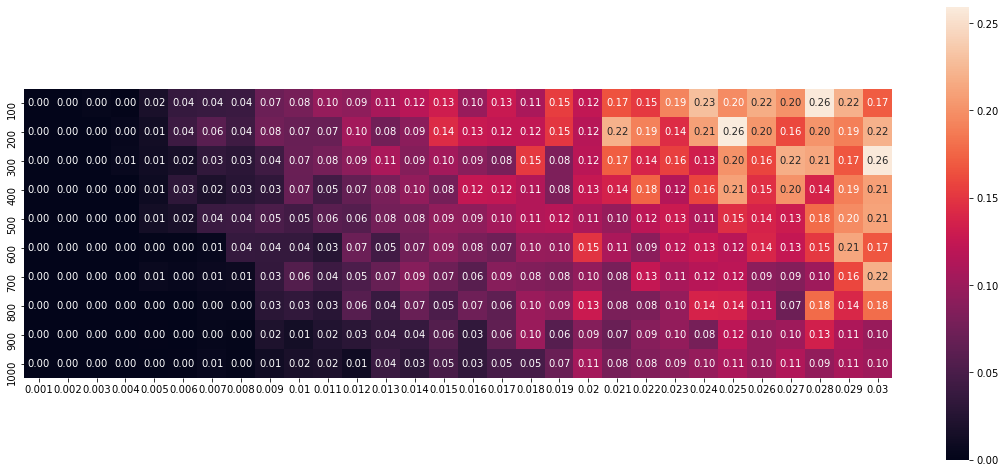

In [126]:
GetFixedPercentS(test_data, [(i+1)*100 for i in range(10)], [(i+1)/1000 for i in range(30)])

### For locuses under selection

In [167]:
def GetFixedPercentSM(data:"numpy array with frequencies",
                      Tn_range:"range of different periods of neutrality",
                      s_range:"range of different forces of selection"):
    
    files = np.array(list(map(lambda name: np.array(name.split('_'))[[0, 2]].astype(dtype=float), sorted(os.listdir(r"C:\HSE\EPISTASIS\nn\next_gen_simulation_densetest")))))
    grid = np.zeros((len(Tn_range), len(s_range)))
    N = data.shape[1]

    for i, Tn in enumerate(Tn_range):
        for j, s in enumerate(s_range):
            selected = data[(files[:, 0] == Tn) * (files[:, 1] == s)]
            for k in range(len(selected)):
                grid[i, j] += 1 / len(selected) if selected[k][501] == 0. else 0. # here frequency equals 0, which is true !!!

        print(f"Done {round((i+1)/len(Tn_range)*100)} %")
    
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(1400 * px, 600 * px))
    sns.heatmap(grid, xticklabels = s_range, yticklabels = Tn_range, annot=True, fmt=".2f", square=True, ax=ax)

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

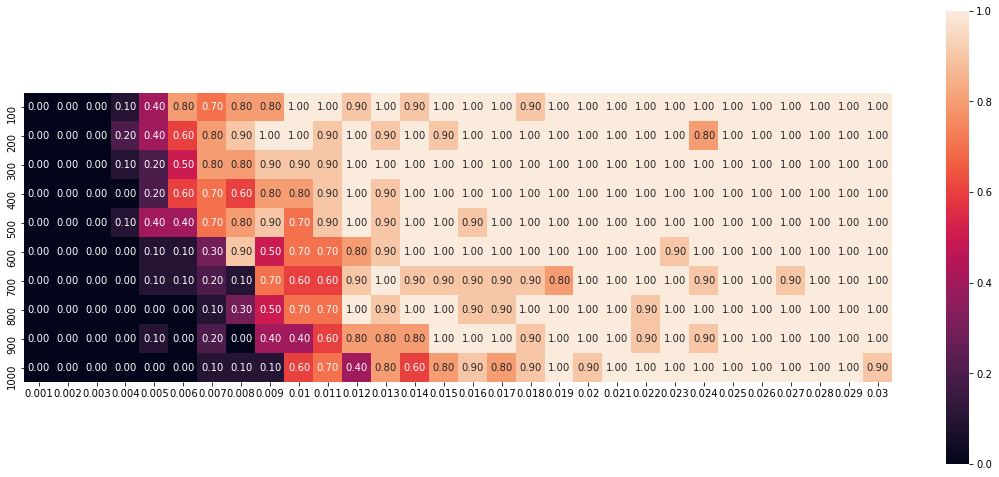

In [168]:
GetFixedPercentSM(test_data, [(i+1)*100 for i in range(10)], [(i+1)/1000 for i in range(30)])

**Finally: upper limit of force of natural selection is 0.003**

# Allele distribution

## Graphical

In [21]:
def AlleleDistribution(f:"admixture rate",
                       s:"force of natural selection",
                       n:"population size",
                       g:"total numper of simulated generations",
                       Tn:"time gap of neutrality",
                       N:"amount of simulations" = 1000):
    
    res = []
    for i in range(N):
        res.append(SimulateTrajectory(f, s, n, g, Tn)[-1])
        
    px = 1 / plt.rcParams['figure.dpi']
    plt.clf()
    fig, ax = plt.subplots(1, 1, figsize=(640 * px, 640 * px))
    ax.hist(res, bins=100, rwidth=0.8)

<Figure size 432x288 with 0 Axes>

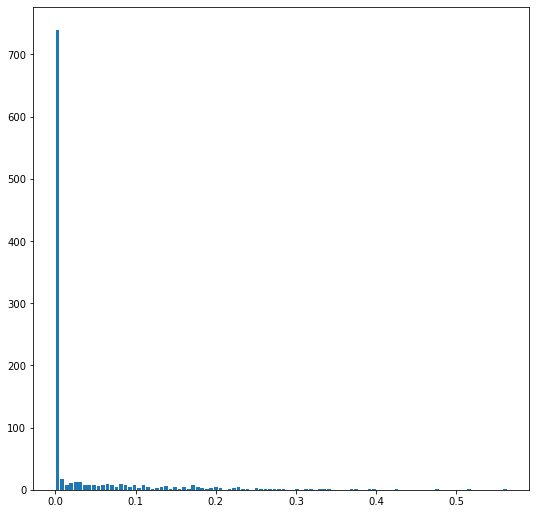

In [36]:
AlleleDistribution(0.03, 0.000, 10000, 2000, 100)

## KS test

In [38]:
def GenDist(f:"admixture rate",
            s:"force of natural selection",
            n:"population size",
            g:"total numper of simulated generations",
            Tn:"time gap of neutrality",
            N:"amount of simulations" = 1000):
    
    res = []
    for i in range(N):
        res.append(SimulateTrajectory(f, s, n, g, Tn)[-1])
    
    return res

In [59]:
d1 = GenDist(0.03, 0.000, 10000, 2000, 1000) # no natural selection (anyway, what Tn parameter should be then?)

s_range = [(i)/10000 for i in range(10, 0, -1)]
samples = 10

p = []

for _, s in enumerate(s_range):
    tmp = 0
    for j in range(samples):
        d2 = GenDist(0.03, s, 10000, 2000, 1000)
        tmp += ks_2samp(d1, d2)[1]
    p.append(tmp / samples)
    print(f"Done {round((_+1)/len(s_range)*100)} %")

Done 10 %
Done 20 %
Done 30 %
Done 40 %
Done 50 %
Done 60 %
Done 70 %
Done 80 %
Done 90 %
Done 100 %


<Figure size 432x288 with 0 Axes>

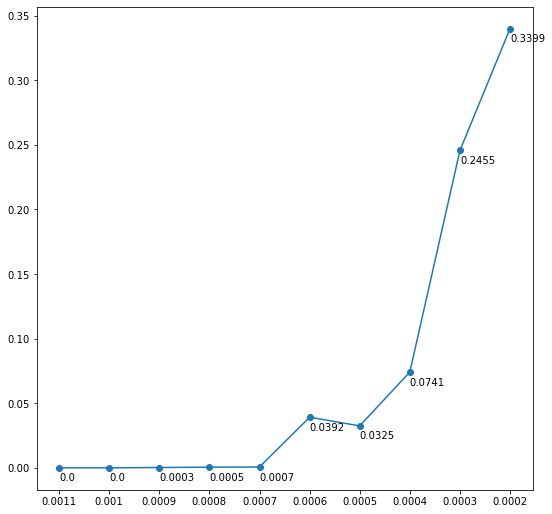

In [78]:
plt.clf()
px = 1 / plt.rcParams['figure.dpi']
fig, ax = plt.subplots(1, 1, figsize=(640 * px, 640 * px))
ax.set_xticks(list(range(0, 10)))
ax.set_xticklabels(s_range)
plt.plot(p, 'o-')

for i in range(len(s_range)):
    plt.annotate(round(p[i],4), xy=(i, p[i]-0.01))

plt.show()

# Results

**Finally: the appropriate interval is from 0.0007 to 0.003**